## Financial News & Stock Price Integration Dataset - Exploratory Data Analysis

Objective: Perform Exploratory Data Analysis (EDA) on financial news data to uncover trends in publication frequency, identify key publishers and their content focus, and extract significant market topics.

Analysis Scope:

Descriptive Statistics: Headline lengths, publisher activity, and basic counts.

Time Series Analysis: Publication trends over time (monthly, daily) and specific publishing times (hourly).

Publisher Analysis: Identifying top contributors, unique email domains, and analyzing the type of news they report.

Text Analysis: Extracting common keywords and performing Topic Modeling (LDA) to identify market themes.

### 1. Setup and Imports
First, we import the necessary libraries and our custom modules from the scripts folder.

In [1]:
import os
import sys
import warnings

# Add scripts directory to path to allow imports
sys.path.insert(0, os.path.dirname(os.getcwd()))

from scripts.data_loader import DataLoader
from scripts.data_analyzer import DataAnalyzer
from scripts.data_visualizer import DataVisualizer

# Configuration
warnings.filterwarnings('ignore')
DATA_FILEPATH = '../data/raw_analyst_ratings.csv'  # Update this path as needed

print("Libraries and Custom Modules Loaded Successfully.")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\amare\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\amare\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\amare\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\amare\AppData\Roaming\nltk_data...


Libraries and Custom Modules Loaded Successfully.


### 2. Data Loading
We utilize the DataLoader class to load the raw CSV data.

In [2]:
# Initialize Loader and Load Data
loader = DataLoader()

try:
    raw_df = loader.load_data(DATA_FILEPATH)
    print(f'\nData Loaded Successfully. Shape: {raw_df.shape}')
    print(raw_df.head())
except FileNotFoundError:
    print("Error: Data file not found. Please check DATA_FILEPATH.")


Data Loaded Successfully. Shape: (1407328, 6)
   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                        date stock  
0  2020-06-05 10:30:54-04:00     A  
1  2020-06-03 10:45

### 3. Initial Exploration & Cleaning
Before visualizing, we must clean the data. The DataAnalyzer class handles:

Date Parsing: Converting strings to datetime objects to enable Time Series analysis.

Feature Engineering: Creating headline_length, hour, and day_of_week columns.

Text Cleaning: Removing extra spaces and standardizing text.

#### Step 1: View Raw Statistics (Missing values, duplicates, etc.)

In [ ]:
# Initialize the Analyzer with raw data
analyzer = DataAnalyzer(raw_df)


analyzer.explore_data()


Initializing DataAnalyzer with dataframe...
Initial dataframe loaded with 1407328 rows and 6 columns.


================= STEP 1: EXPLORING RAW DATA (Descriptive Statistics) =================

[1] Dataset Overview:
--------------------------------------------------
Total Records: 1407328
Columns: Unnamed: 0, headline, url, publisher, date, stock

[2] Checking Missing Values:
--------------------------------------------------
Series([], dtype: int64)

[3] Checking Duplicate Rows:
--------------------------------------------------
Duplicates Found: 0 rows
(Excluding 'Unnamed: 0') Duplicates: 1

[4] Summary Statistics (Numeric Columns):
--------------------------------------------------
         Unnamed: 0
count  1.407328e+06
mean   7.072454e+05
std    4.081009e+05
min    0.000000e+00
25%    3.538128e+05
50%    7.072395e+05
75%    1.060710e+06
max    1.413848e+06

[5] Categorical Column Analysis:
--------------------------------------------------

Column: headline
Unique values: 845770
To

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A
...,...,...,...,...,...,...
1407323,1413844,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,2011-08-29 00:00:00,ZX
1407324,1413845,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,2011-06-22 00:00:00,ZX
1407325,1413846,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,2011-06-21 00:00:00,ZX
1407326,1413847,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,2011-06-21 00:00:00,ZX


#### Step 2: Clean Data and Create Features
#### This returns the cleaned dataframe to be used by the Visualizer

In [4]:

clean_df = analyzer.clean_data()


================= STEP 2: CLEANING DATA =================

[1] Dropping rows missing headline, stock, or publisher...
Removed 0 rows.

[2] Removing duplicate headline/stock/date combinations...
Removed 11355 duplicates.

[3] Dropping unnecessary column 'Unnamed: 0'...

[4] Fixing and parsing date column...
Removed 0 rows with invalid dates.

[5] Cleaning text columns (headline, publisher, stock)...

[6] Cleaning URL column...

[7] Removing remaining empty strings...
Removed 0 rows.

[8] Sorting by date...

[9] Creating new derived columns (year, month, day_of_week, headline_length, hour)...

=== Completed Data Cleaning ===



#### Step 3: Initialize Visualizer with the cleaned dataframe

In [5]:
visualizer = DataVisualizer(clean_df)

### 4. Descriptive Statistics & Time Series Analysis
In this section, we analyze:

Headline Lengths: Are headlines short and punchy or detailed?

Time Series: We look at the volume of news over time to identify spikes (Monthly trends).

Publishing Times: We analyze the hour column to see if news correlates with Market Open/Close times.

Weekdays: Frequency of news by day of the week.

In [6]:
# Get numerical summaries in the console
analyzer.exploratory_analysis()


================= STEP 3: DEEPER EXPLORATORY ANALYSIS (Time Series & Publishing Times) =================
[1] Dataset Shape:
(1395973, 10)

[2] Date Range (Time Series Trends):
2009-02-14 00:00:00-04:00  -->  2020-06-11 17:12:35-04:00

[3] Top 10 Most Covered Stocks:
stock
MRK     3300
MS      3149
MU      3138
NVDA    3137
NFLX    3028
EBAY    3012
M       2998
VZ      2962
GILD    2951
QCOM    2933
Name: count, dtype: int64

[4] Articles by Hour of Day (Publishing Times Analysis):
hour
0     1340058
1          14
2          57
3          93
4        1469
5        1829
6        2475
7        5032
8        5526
9        5965
10       7668
11       5701
12       5732
13       2710
14       2075
15       1612
16       3939
17       2799
18        704
19        227
20        131
21         82
22         48
23         27
Name: count, dtype: int64

[5] Headline Length Statistics (Descriptive Statistics):
count    1.395973e+06
mean     7.326273e+01
std      4.081928e+01
min      3.000000e+00

,headline,url,publisher,date,stock,year,month,day_of_week,headline_length,hour
0,How Treasuries and ETFs Work,https://www.benzinga.com/28044/how-treasuries-...,Paco Ahlgren,2009-02-14 00:00:00-04:00,NAV,2009,2,Saturday,28,0
1,Update on the Luxury Sector: 2nd Quarter 2009,https://www.benzinga.com/charles-lewis-sizemor...,Charles Lewis Sizemore Cfa,2009-04-27 00:00:00-04:00,FT,2009,4,Monday,45,0
2,Update on the Luxury Sector: 2nd Quarter 2009,https://www.benzinga.com/charles-lewis-sizemor...,Charles Lewis Sizemore Cfa,2009-04-27 00:00:00-04:00,Y,2009,4,Monday,45,0
3,Going Against the Herd,https://www.benzinga.com/charles-lewis-sizemor...,Charles Lewis Sizemore Cfa,2009-04-29 00:00:00-04:00,A,2009,4,Wednesday,22,0
4,Charles Sizemore Radio Interview Saturday Morning,https://www.benzinga.com/11218/charles-sizemor...,Charles Lewis Sizemore Cfa,2009-05-22 00:00:00-04:00,AM,2009,5,Friday,49,0
...,...,...,...,...,...,...,...,...,...,...
1395968,7 Stocks Moving In Thursday's After-Hours Session,https://www.benzinga.com/news/20/06/16237924/7...,Tyree Gorges,2020-06-11 16:49:41-04:00,PVH,2020,6,Thursday,49,16
1395969,"Financials, Energy Among Worst-Hit Sectors In ...",https://www.benzinga.com/news/20/06/16238109/f...,Jj Kinahan,2020-06-11 16:51:33-04:00,WMT,2020,6,Thursday,84,16
1395970,"Twitter Removes About 174,000 China-Linked Acc...",https://www.benzinga.com/tech/20/06/16238284/t...,Benzinga Newsdesk,2020-06-11 17:01:39-04:00,TWTR,2020,6,Thursday,130,17
1395971,PG&E Corp Reports CPUC Approved Co.'s Microgri...,https://www.benzinga.com/news/20/06/16238398/p...,Benzinga Newsdesk,2020-06-11 17:11:20-04:00,PCG,2020,6,Thursday,57,17


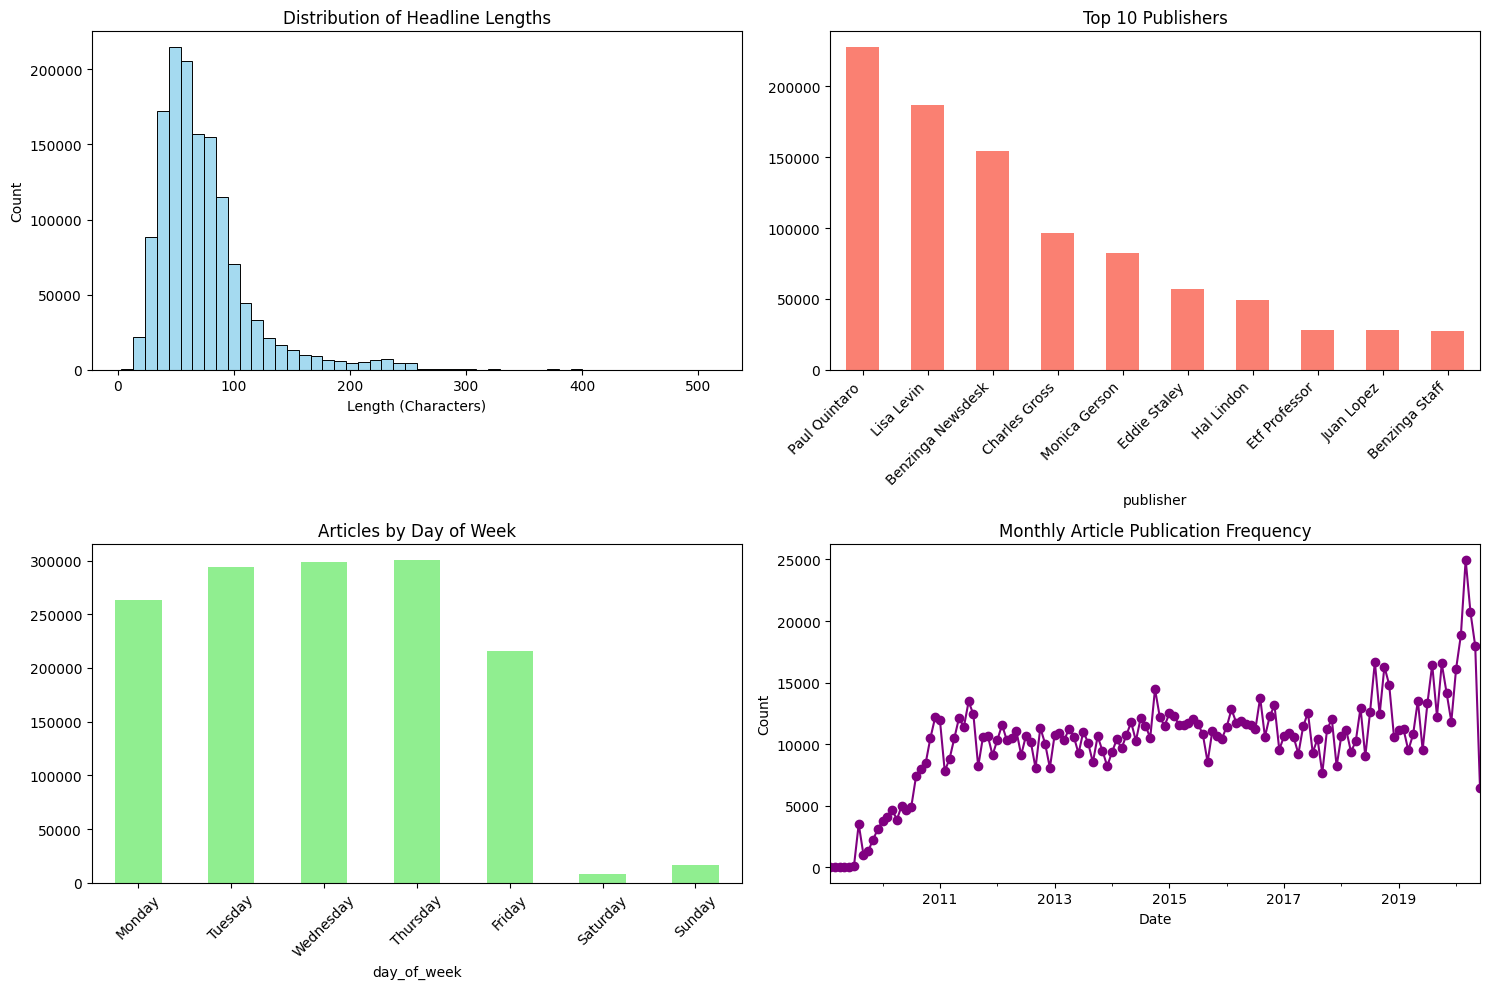

In [7]:
# Generate visualizations:
# 1. Headline Length Distribution
# 2. Top 10 Publishers Bar Chart
# 3. Articles by Day of Week
# 4. Monthly Publication Timeline
visualizer.descriptive_statistics()

### 5. Publisher Analysis
We investigate the sources of the news:

Top Publishers: Who contributes the most volume?

Content Focus: Do specific publishers focus on Earnings, Ratings, or General News?

Domains: Identifying unique organizations from email addresses found in the publisher column.

#### 1. Print Counts & Extract Domains 

In [8]:

analyzer.analyze_publishers()


================= STEP 6: PUBLISHER & DOMAIN ANALYSIS =================
[1] Counting articles by publisher (Publisher Analysis)...
publisher
Paul Quintaro        227495
Lisa Levin           186716
Benzinga Newsdesk    154645
Charles Gross         96558
Monica Gerson         82056
Eddie Staley          56896
Hal Lindon            48958
Etf Professor         28251
Juan Lopez            28110
Benzinga Staff        27526
Name: count, dtype: int64

[2] Analyzing Publisher Content Focus (Publisher Analysis)...

Publisher Content Breakdown:
article_type       Analyst Ratings  Earnings/Reports  General Market  \
publisher                                                              
Benzinga Newsdesk             6252             45923           35997   
Charles Gross                 1755             16572            3327   
Lisa Levin                   26606             22882           97331   
Monica Gerson                10990             22815           30246   
Paul Quintaro              

,headline,url,publisher,date,stock,year,month,day_of_week,headline_length,hour,article_type
0,How Treasuries and ETFs Work,https://www.benzinga.com/28044/how-treasuries-...,Paco Ahlgren,2009-02-14 00:00:00-04:00,NAV,2009,2,Saturday,28,0,Other News
1,Update on the Luxury Sector: 2nd Quarter 2009,https://www.benzinga.com/charles-lewis-sizemor...,Charles Lewis Sizemore Cfa,2009-04-27 00:00:00-04:00,FT,2009,4,Monday,45,0,Other News
2,Update on the Luxury Sector: 2nd Quarter 2009,https://www.benzinga.com/charles-lewis-sizemor...,Charles Lewis Sizemore Cfa,2009-04-27 00:00:00-04:00,Y,2009,4,Monday,45,0,Other News
3,Going Against the Herd,https://www.benzinga.com/charles-lewis-sizemor...,Charles Lewis Sizemore Cfa,2009-04-29 00:00:00-04:00,A,2009,4,Wednesday,22,0,Other News
4,Charles Sizemore Radio Interview Saturday Morning,https://www.benzinga.com/11218/charles-sizemor...,Charles Lewis Sizemore Cfa,2009-05-22 00:00:00-04:00,AM,2009,5,Friday,49,0,Other News
...,...,...,...,...,...,...,...,...,...,...,...
1395968,7 Stocks Moving In Thursday's After-Hours Session,https://www.benzinga.com/news/20/06/16237924/7...,Tyree Gorges,2020-06-11 16:49:41-04:00,PVH,2020,6,Thursday,49,16,General Market
1395969,"Financials, Energy Among Worst-Hit Sectors In ...",https://www.benzinga.com/news/20/06/16238109/f...,Jj Kinahan,2020-06-11 16:51:33-04:00,WMT,2020,6,Thursday,84,16,Other News
1395970,"Twitter Removes About 174,000 China-Linked Acc...",https://www.benzinga.com/tech/20/06/16238284/t...,Benzinga Newsdesk,2020-06-11 17:01:39-04:00,TWTR,2020,6,Thursday,130,17,Other News
1395971,PG&E Corp Reports CPUC Approved Co.'s Microgri...,https://www.benzinga.com/news/20/06/16238398/p...,Benzinga Newsdesk,2020-06-11 17:11:20-04:00,PCG,2020,6,Thursday,57,17,Earnings/Reports


#### 2. Analyze Content Focus (Earnings vs Ratings vs General)
This creates a cross-tabulation of publishers vs. news categories

In [9]:
analyzer.analyze_publisher_content()

AttributeError: 'DataAnalyzer' object has no attribute 'analyze_publisher_content'

#### 3. Visualize the Content Focus
#Plots a stacked bar chart showing what type of news the top publishers write

Generating Publisher Content Type Analysis...


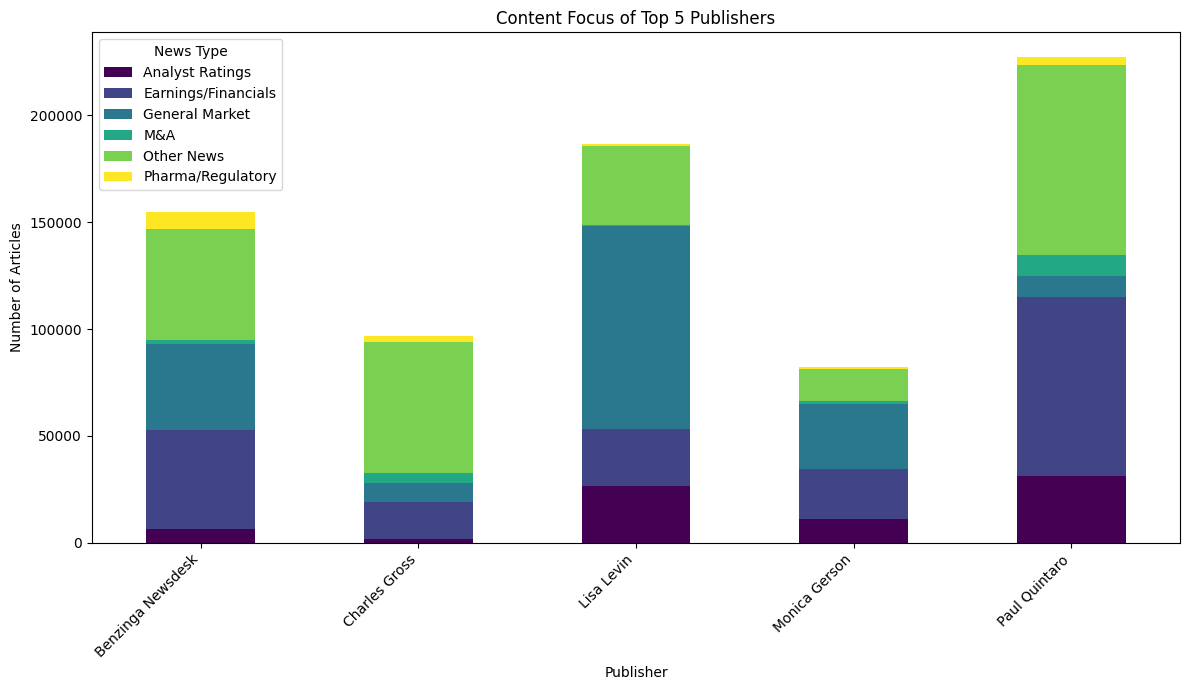

In [10]:

visualizer.plot_publisher_types()

### 6. Text Analysis: Key Phrases
We search for specific financial keywords (e.g., "FDA Approval", "Price Target", "Earnings") to quantify significant market events.

In [11]:
# Search headlines for predefined list of financial events
phrase_counts = analyzer.analyze_key_phrases()


================= STEP 5: KEY FINANCIAL PHRASE ANALYSIS (Text Analysis) =================
Searching headlines for common financial event keywords...
Phrase 'price target' found in 47616 headlines.
Phrase 'upgrade' found in 61738 headlines.
Phrase 'downgrade' found in 66678 headlines.
Phrase 'earnings' found in 86192 headlines.
Phrase 'fda approval' found in 1545 headlines.
Phrase 'merger' found in 5591 headlines.
Phrase 'acquisition' found in 8847 headlines.
Phrase 'ipo' found in 8169 headlines.
Phrase 'stock split' found in 747 headlines.
Phrase 'dividend' found in 21434 headlines.
Phrase 'guidance' found in 15595 headlines.
Phrase 'analyst rating' found in 57 headlines.

=== Completed Key Phrase Analysis ===



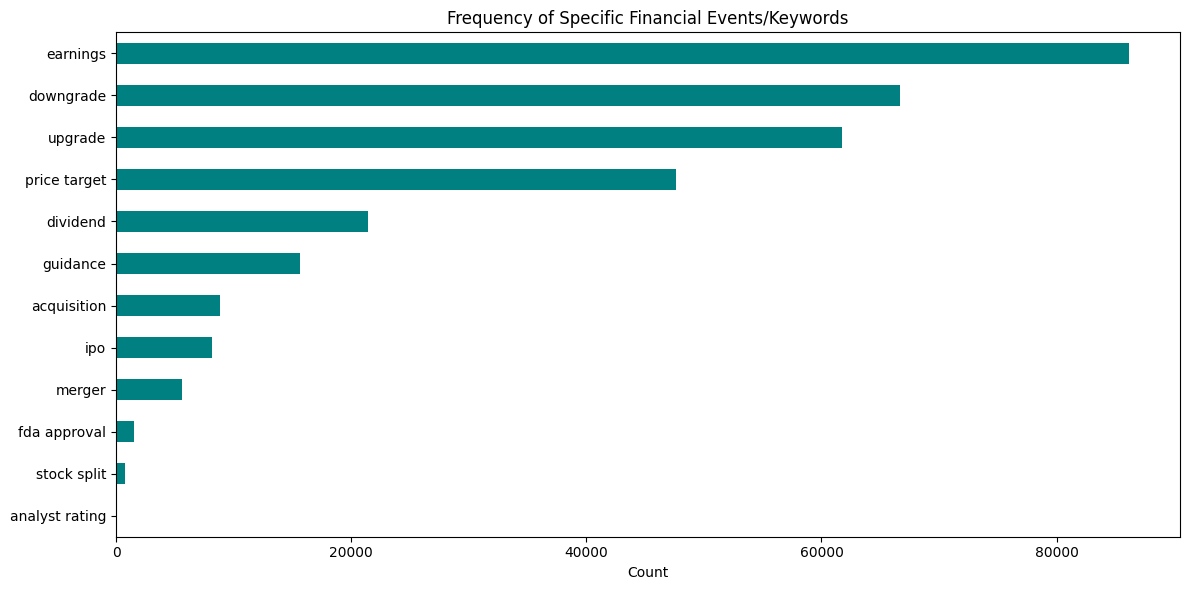

In [12]:
# Visualize the frequency of these specific events
visualizer.visualize_key_phrases(phrase_counts)

### 7. Text Analysis: Topic Modeling (LDA)
We use Latent Dirichlet Allocation (LDA) to discover hidden thematic structures in the headlines.

Preprocessing: We remove common stopwords and financial-specific stopwords (like "stocks", "market", "trading") to ensure the topics are meaningful.

Visualization: We display the top keywords associated with each topic.

In [13]:
# Extract Topics using LDA (defaults to 5 topics)
# This returns a dictionary of {Topic Name: [List of Keywords]}
lda_topics = analyzer.extract_topics(num_topics=5)


================= STEP 4: TEXT ANALYSIS (Topic Modeling with NLTK) =================
[1] Preprocessing headlines (NLTK: Stopwords & Lemmatization)...
Running topic modeling on a sample of 20000 headlines for performance...
[2] Vectorizing text (CountVectorizer)...
[3] Fitting LDA model with 5 topics (scikit-learn)...

[4] Discovered Topics:
Topic 1: dividend, miss, earnings, eps, watch, announces, sale, beat, share, estimate
Topic 2: result, price, news, market, oil, say, lower, higher, etf, company
Topic 3: gainer, monday, thursday, loser, upgrade, midday, downgrade, premarket, moving, benzingas
Topic 4: downgrade, lower, earnings, high, maintains, raise, price, target, buy, week
Topic 5: adj, alert, earnings, industry, option, revenue, sale, report, eps, est

=== Completed Topic Modeling ===



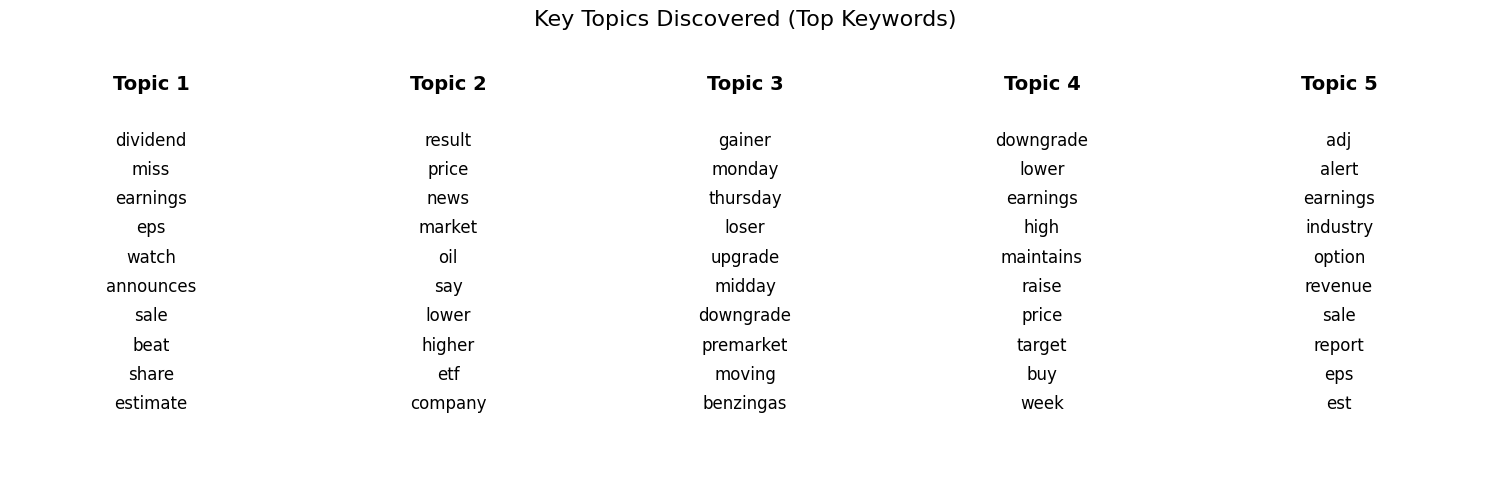

In [14]:
# Visualize the resulting topics as word charts
visualizer.visualize_topics(lda_topics)

In [ ]:
# Optional: Save the cleaned and processed data for future use
analyzer.save_to_csv('../data/processed_financial_news.csv')